## 1. 作业 
### (1).  用二分法 bisection 算法计算函数 ```f(x) = x^2 + 3x - 10``` 的根

- 二分法是比较简单、但速度较慢的一种求根方法。它的主要思想是：如果 f(a) 和 f(b) 异号，且函数方程连续，那么函数的根一定处在 a 和 b 之间。我们通过中间点 c 来估测方程的根所在的位置。如果 f(c) 为 0， c 即为 函数的根。 如果 f(c) 不为 0， 取 f(a) 和 f(b) 当中与 f(c) 异号的那一个值构建新的求根区间，继续计算中间点求根。 

<img src="http://3.bp.blogspot.com/-PeikQj3RtVE/T_sHy7MmnGI/AAAAAAAAAAU/xq5MfC8GpdY/s1600/Untitled.png" width="47%" height="100%" style="float:left"/>

- 考虑可能遇到的三种情况      
     - f(a) 或 f(b) 正好是函数方程的根 
     - f(a) 与 f(b) 同号 
     - f(a) 与 f(b) 异号，且不为函数方程的根   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

1 iteration(s), the midpoint is -4.0
2 iteration(s), the midpoint is -6.5
3 iteration(s), the midpoint is -5.25
4 iteration(s), the midpoint is -4.625
5 iteration(s), the midpoint is -4.9375
6 iteration(s), the midpoint is -5.09375
7 iteration(s), the midpoint is -5.015625
8 iteration(s), the midpoint is -4.9765625
9 iteration(s), the midpoint is -4.99609375
10 iteration(s), the midpoint is -5.005859375
11 iteration(s), the midpoint is -5.0009765625
12 iteration(s), the midpoint is -4.99853515625
13 iteration(s), the midpoint is -4.99975585938
14 iteration(s), the midpoint is -5.00036621094
15 iteration(s), the midpoint is -5.00006103516
16 iteration(s), the midpoint is -4.99990844727
17 iteration(s), the midpoint is -4.99998474121
After 17 iteration(s), the outcome is -4.99998474121


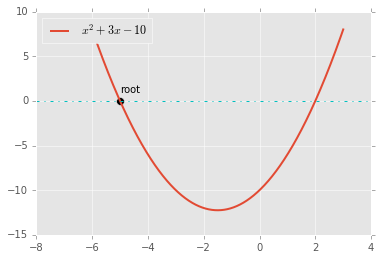

In [438]:
def bisection(a, b, TOL):
    
# 设置函数与循环次数    
    f = np.poly1d([1, 3, -10])
    i = 1
    N = 20
    
# 画图    
    q = np.linspace(-6, 3, 1000)
    y = f(q)
    plt.plot(q, f(q), lw=2)
    plt.legend(['$x^2+3x-10$'], loc=2)
    
# f(a), f(b) 同号   
    if f(a)*f(b) > 0.0:  
        print "!Warning: f(a) and f(b) need to have opposite signs"
        return None
    
# f(a), f(b) 为 0    
    if f(a) == 0.0:
        plt.axhline(f(a), ls='-.', c = 'c')
        plt.scatter(a, f(a), c = 'k', s = 60)
        plt.text(a, f(a) + 1, 'root')
        print 'The outcome is the left bound:', a
        return
    
    if f(b) == 0.0:
        plt.axhline(f(b), ls='-.', c = 'c')
        plt.scatter(b, f(b), c = 'k', s = 60)
        plt.text(b-1, f(b) + 1, 'root')
        print 'The outcome is the right bound:', b
        return
    
# f(a) * f(b) < 0
    else:
        while i < N:
            mid = a + (b-a)/2 
            print i, 'iteration(s), the midpoint is', mid
            
            if f(mid) == 0.0 or (b-a)/2 < TOL: # TOL 为逼近误差
                plt.axhline(f(mid), ls='-.', c = 'c')
                plt.scatter(mid, f(mid), c = 'k', s = 60)
                plt.text(mid, f(mid) + 1, 'root')
                print 'After', i, 'iteration(s),', 'the outcome is', mid
                return
            i += 1
            if f(a)*f(mid) > 0.0: 
                a = mid
            else:
                b = mid
 
bisection(-9.0, 1, 10e-5)

#### bisection method － scipy 实现
```f(a), f(b) 同号时， scipy bisection 函数也会报错```

In [5]:
f = np.poly1d([1, 3, -10])
print 'Solutions:', opt.bisect(f, -6, 0),',', opt.bisect(f, 3, 0), 

Solutions: -5.0 , 2.0


### (2).  用梯度下降法 Gradient descent 算法计算函数 ```f(x) = x^2 + 3x - 10``` 的根

#### 什么是梯度下降法？
- 梯度下降法，可作为一种求解最小二乘法的方式，它是最优化中比较古老的一种方法
- 定义
    - 什么是梯度下降？
        - 梯度下降，设定起始点负梯度方向 (即数值减小的方向) 为搜索方向，寻找最小值。梯度下降法越接近目标值，步长越小，前进越慢

<img src="http://pic002.cnblogs.com/images/2012/381513/2012041019443995.png" width="40%" height="40%" style="float:left"/>


- 例子
     - 求函数$f(x) = x^2 + 3x - 10$ 的最小值
     - 1 求梯度 Δ = 2x + 3
     - 2 向梯度相反的方向移动 x 
         - 如果步长足够小，则可以保证每一次迭代都在减小，但可能导致收敛太慢。如果步长太大，则不能保证每一次迭代都减少，也不能保证收敛
     - 3 循环迭代步骤 2，直到 x 的值变化到使得 f(x) 在两次迭代之间的差值足够小，比如 1e-10。也就是说，直到两次迭代计算出来的 f(x) 基本没有变化，则说明此时 f(x) 已经达到局部最小值了

In [2]:
f = np.poly1d([1, 3, -10])
d = f.deriv()

def gradient(x0, epsilon=1e-10, step=0.1):
    p0 = x0 * 1.0

    i = 1
    N = 300
    
    while i < N:
        p = p0 - step * d(p0)
        if abs(f(p0) - f(p)) < epsilon:
            return 'Estimation: %s' % p
        p0 = p
        
    print 'Warning: too many iterations!'

gradient(-6)

'Estimation: -1.50001077536'

---

## 2. 练习
### (1) 用牛顿迭代法 Newton's method 计算函数 ```f(x) = x^2 + 3x - 10```  的根

#### 牛顿迭代法：
- 不断用 (x,f(x)) 的切线来逼近方程的根
- 下图显示牛顿法的迭代过程：蓝线是给定的函数 f，红线是切线。若 f'(x{k})=0，牛顿法将中止

<img src="https://farzanmaghami.files.wordpress.com/2015/05/newtoniteration_ani.gif" width="40%" height="40%" style="float:left"/>


#### 牛顿迭代法的计算公式：    
```X(n+1) = X{n} - f(X{n}) / f'(X{n})```

#### 用牛顿迭代法求根步骤：
1. 设定目标误差 error > 0，持续迭代，直到 X{k+1} - X{k} < error 为止。
1. 先随便挑一个点 x1 作为根的估计值，过点 (x1, f(x1)) 做曲线的切线，得到切线斜率 f'(x1)
2. 接着取切线与 x 轴的交点 x2 为新估值点，检查 f(x2) 是否趋向于 0
3. 如果 f(x2) 不趋向于 0： 重复步骤 1、2，找到一点 xn，使得 f(xn) 趋于0，即找到方程的根   

In [498]:
f = np.poly1d([1, 3, -10])
d = f.deriv()

def newton(f, x0, error):
    guess = x0
    newguess = guess + 3* error  # 设置一个不同于guess的值
    if np.abs(newguess-guess) < error:
            print 'Too many iterations!'
            return
    while (np.abs(guess - newguess) > error):  
        print "f(", newguess, ") = ", f(newguess)    
        guess = newguess
        newguess = guess - f(guess) / d(guess)
    return newguess

solution = newton(f, -3, 1e-8)   

print "Solution x = ", solution 

f( -2.99999997 ) =  -10.00000009
f( -6.3333334 ) =  11.1111117556
f( -5.18390806183 ) =  1.32117860802
f( -5.00459052922 ) =  0.0321547775016
f( -5.00000300648 ) =  2.10453648979e-05
f( -5.0 ) =  9.03987995571e-12
Solution x =  -5.0


#### Newton method － scipy 实现

In [493]:
opt.newton(f, -6)

-5.0

### (2) 用割线法 secant method 计算函数 ```f(x) = x^2 + 3x - 10```  的根
割线法利用牛顿迭代法的思想，基本思想是用区间 [tk，tk＋1] 上的割线近似代替目标函数的导函数曲线。割线法用曲线上某一点的割线来逼近方程的根。

#### 割线法的问题
- 一开始选定的两点，如果不够靠近根，割线可能会乱跑。

<img src="http://www.csie.ntnu.edu.tw/~u91029/SecantMethod1.png" width="40%" height="40%" style="float:left"/>

- 运气不好时，割线呈水平线，割线法会故障；割线趋近水平线，下一点会溢位。

<img src="http://www.csie.ntnu.edu.tw/~u91029/SecantMethod2.png" width="30%" height="30%" style="float:left"/>

In [528]:
def secant(x1,x2,ftol,xtol):
    f1 = f(x1)
    if abs(f1) <= ftol : return x1       
    f2 = f(x2)
    if abs(f2) <= ftol : return x2        
    while abs(x2 - x1) > xtol :
        slope = (f2 - f1)/(x2 - x1)
        if slope == 0 : break
        x3 = x2 - f2/slope               
        f3 = f(x3)                      
        if abs(f3) <= ftol : break
        x1,f1 = x2,f2                   
        x2,f2 = x3,f3
    return x3

print 'Solutions:', secant(0, 5, 10e-3, 10e-3), ',',secant(-5, 0, 10e-3, 10e-3)

Solutions: 2 , -5


### (3) 有约束的最优化
- 现实生活中的最优化问题往往是有约束条件的：   
例如，一组参数之和必需为1（等式约束），或者有些参数必须为非负 (不等式约束)。有时候，约束条件可能并入到函数之中来进行最小化。


- 例子 ```f(x)=−(2xy+2x−x2−2y2+1)```
    - 同时服从两个约束条件
        - 等式约束 ``` x3−y=0 ``` 
        - 不等式约束 ``` y−(x−1)^4−2≥0 ``` 
    - 也保持在一定界限以内  
        - ``` 0.5 ≤ x ≤ 1.5``` 
        - ```1.5 ≤ y ≤ 2.5```

In [63]:
# 设置函数方程
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2 +1)

In [64]:
# 用字典来设置约束条件
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})
bnds = ((1.0, 1.5), (1.7, 2.2))

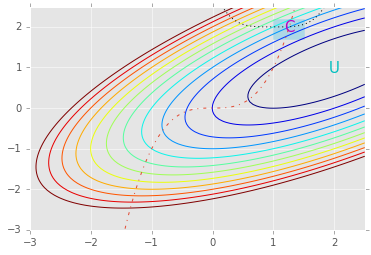

In [93]:
x0 = [0, 2.5]

# 无约束条件的最小化
u = opt.minimize(f, x0, constraints=None)
# 有约束条件的最小化
c = opt.minimize(f, x0, bounds=bnds, constraints=cons)

x = np.linspace(-3, 2.5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, '-.', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(u['x'][0], u['x'][1], 'U', va='center', ha='center', size=15, color='c')
plt.text(c['x'][0], c['x'][1], 'C', va='center', ha='center', size=15, color='m')
plt.fill([1.0,1.0,1.5,1.5], [2.2,1.7,1.7,2.2], color = 'lightblue')
plt.axis([-3,2.5,-3,2.5]);

### (3) 曲线拟合 scipy 与 sk-learn

#### scipy实现
用到了 scipy 自带的曲线拟合功能 polyfit 

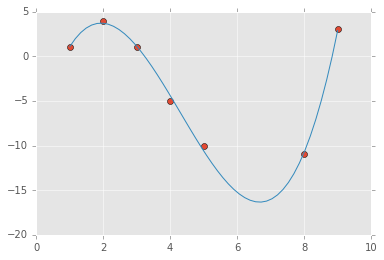

In [136]:
from scipy import *

points = np.array([(1, 1), (2, 4), (3, 1), (4, -5), (5, -10), (8, -11), (9, 3)])
x = points[:,0]
y = points[:,1]

z = polyfit(x, y, 3)
f = poly1d(z)

x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

#### sk-learn实现

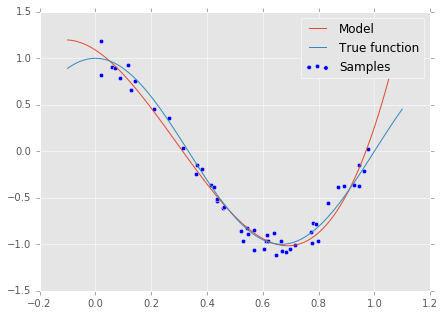

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 50

fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(7, 5))

polynomial_features = PolynomialFeatures(degree=3, include_bias=False)

pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])

pipeline.fit(X[:, np.newaxis], y)

scores = cross_validation.cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

X_test = np.linspace(-0.1, 1.1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.legend()
plt.show()

---

## 3. 笔记
####  (1). 如果最优化的起始点离最小值很远，会发生什么？
    - 问题：起始点会慢慢接近最小值的位置。初始值远了，最小值可能陷入局部最小的问题：scipy minimize 有可能找不到全局最小
    - 解决： 用另一个方法找全局最优点，basinhopping
####  (2). 曲线拟合和最优化有什么关系？
- 曲线拟合是什么？
    - 曲线拟合，是把现有数据代入一个数式的表现方式。有了一个数式之后，我们可以根据数式来推测没有出现在原有数据中的数值。比如，依据已知的房形面积、地段和房价来构造一个回归模型，以此来预测某间公寓的房价。找到一条曲线来拟合已有的房价相关数点，得到预测数式的过程，即为一个曲线拟合的过程
- 曲线拟合和最优化的关系？
    - 曲线拟合是做不到尽善尽美的，有拟合，也就有误差。因此，我们会得到一个估计函数A，也会得到一个损失函数B。损失函数B可以用来评价估计函数A的好坏，即估计值与真实值之间的差异大小。在应用中，我们希望尽可能地减少估计值与真实值之间的差异。这时候，就需要最小化损失函数B，这就是一个最优化的过程。
    - 应用 : 用最优化来寻找曲线拟合的参数。
- 最优化的定义参考
    - In optimization of a design, the design objective could be simply to minimize the cost of production or to maximize the efficiency of production. An optimization algorithm is a procedure which is executed iteratively by comparing various solutions till an optimum or a satisfactory solution is found
    - [最优化应用的一个例子  👇](https://www.zhihu.com/question/26341871)

#### (3). 最优化与求根的关系？
- 举个例子，我们在最优化损失函数的时候，可以把最优化问题转化为另一个问题，即求解损失函数的导数。这样，最优化问题也就变成了看成方程求解问题，即 f' = 0 

#### (4). 什么是最小二乘法？
- 最小二乘法可作为曲线拟合的一种方法，它的目标在于求得估计值与真实值之间的最小误差平方和，以此来解决回归问题
     
#### (5). 牛顿迭代法与梯度下降法的比较
- 与梯度下降法的比较：梯度下降法主要使用了目标函数的一阶偏导信息，而牛顿法利用了一阶和二阶偏导信息来推测整个目标函数的形状，进而求得近似函数的全局最小值。因此，牛顿法具有一定的全局预测性，收敛性质更为优良
- [为什么牛顿迭代法的迭代次数小于梯度下降法? 👇 ](https://www.zhihu.com/question/19723347)

#### (6). 函数最大最小值：函数加负号，原函数在 x 处得最小值，新函数在 x 处得最大值